In [8]:
import pandas as pd # import pandas package under shorthand "pd"
import matplotlib.pyplot as plt # import matplotlib.pyplot as "plt" for plotting and visualization
import seaborn as sns  # seaborn for creating correlation heatmap visualization

from sklearn.model_selection import train_test_split # function to split data into training and test sets

In [9]:
df = pd.read_csv('data/student_exam_scores.csv')

df = df.drop(['student_id'], axis = 1)

studies = df['hours_studied'].to_numpy()
sleep = df['sleep_hours'].to_numpy()
attendance = df['attendance_percent'].to_numpy()
previous = df['previous_scores'].to_numpy()
score = df['exam_score'].to_numpy()
df.head(5)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3


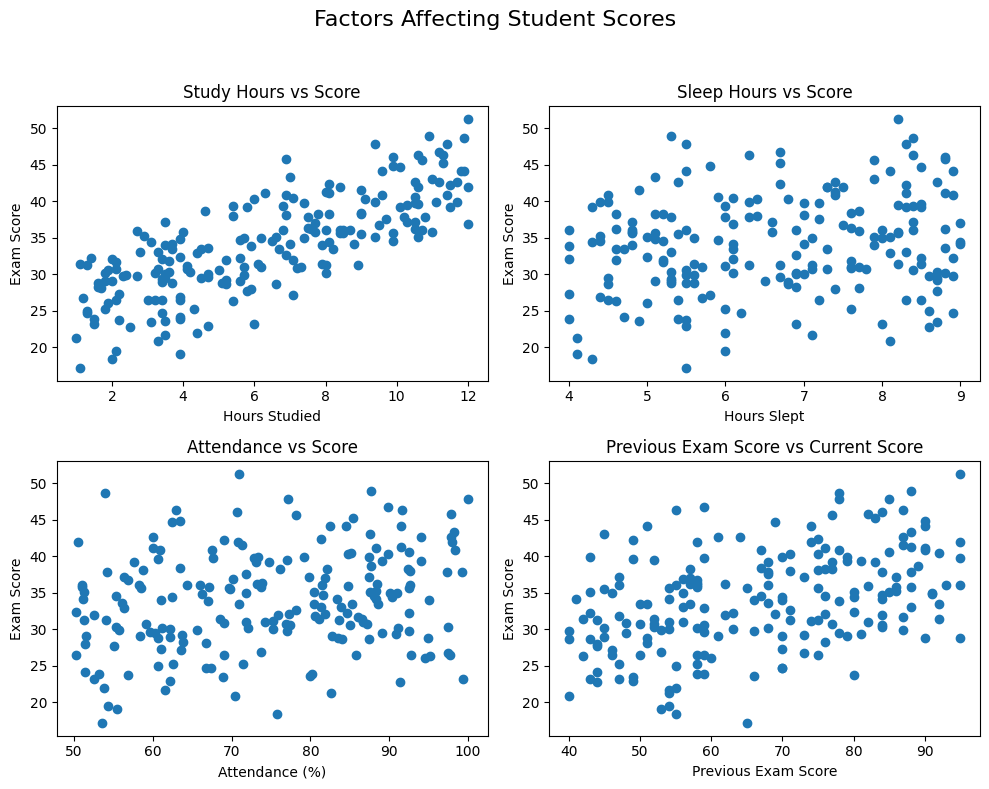

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-left
axs[0, 0].scatter(studies, score)
axs[0, 0].set_title('Study Hours vs Score')
axs[0, 0].set_xlabel('Hours Studied')
axs[0, 0].set_ylabel('Exam Score')

# Top-right
axs[0, 1].scatter(sleep, score)
axs[0, 1].set_title('Sleep Hours vs Score')
axs[0, 1].set_xlabel('Hours Slept')
axs[0, 1].set_ylabel('Exam Score')

# Bottom-left
axs[1, 0].scatter(attendance, score)
axs[1, 0].set_title('Attendance vs Score')
axs[1, 0].set_xlabel('Attendance (%)')
axs[1, 0].set_ylabel('Exam Score')

# Bottom-right
axs[1, 1].scatter(previous, score)
axs[1, 1].set_title('Previous Exam Score vs Current Score')
axs[1, 1].set_xlabel('Previous Exam Score')
axs[1, 1].set_ylabel('Exam Score')

# General title for the whole figure
fig.suptitle('Factors Affecting Student Scores', fontsize=16)

# Improve spacing so suptitle doesn't overlap subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

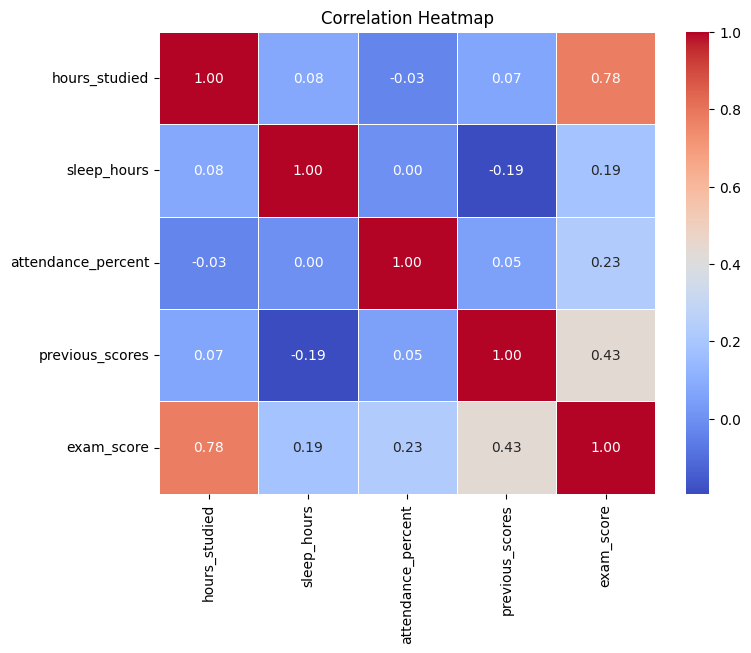

In [11]:
# Compute correlation matrix
matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

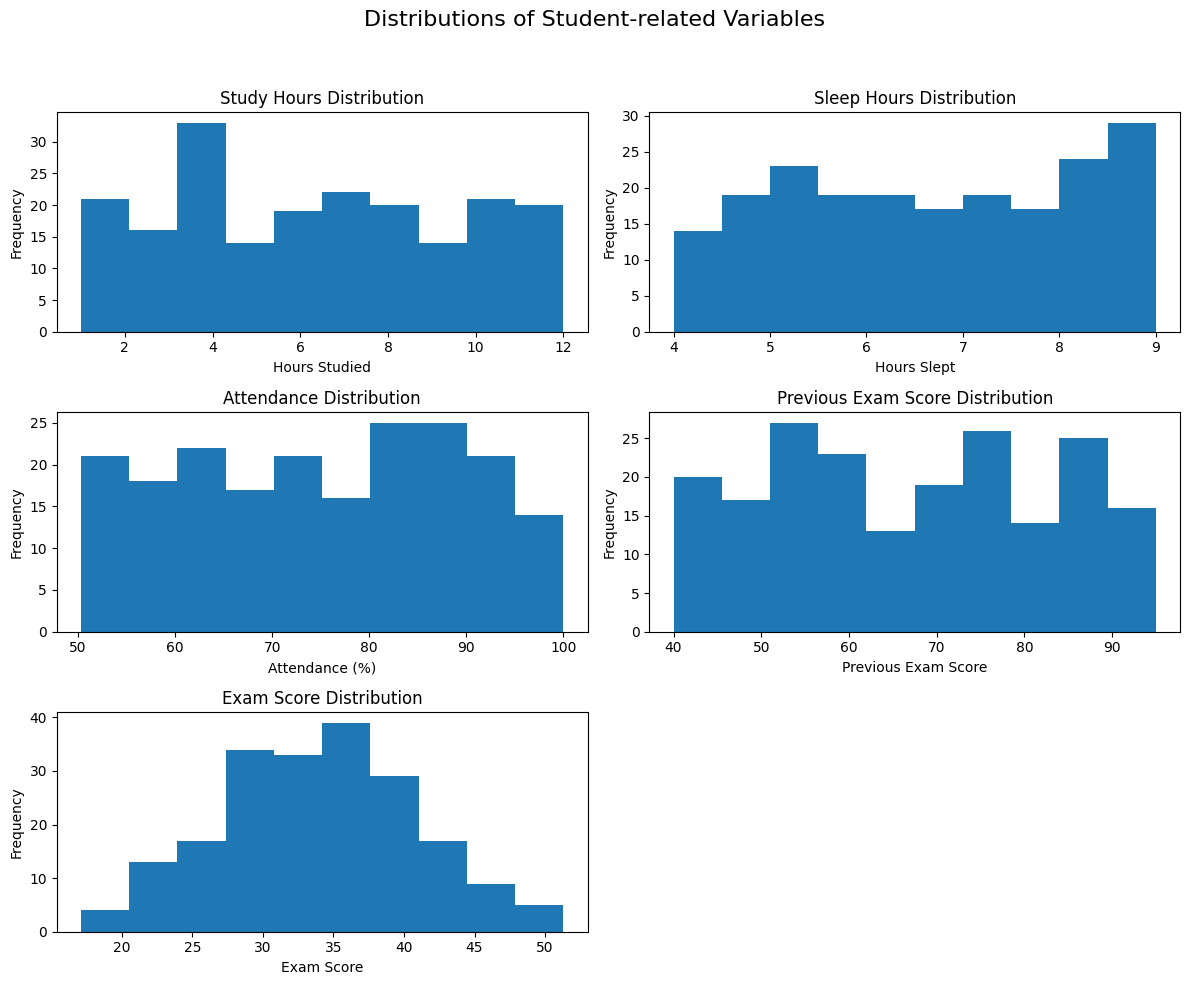

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Top-left histogram
axs[0, 0].hist(studies)
axs[0, 0].set_title('Study Hours Distribution')
axs[0, 0].set_xlabel('Hours Studied')
axs[0, 0].set_ylabel('Frequency')

# Top-right histogram
axs[0, 1].hist(sleep)
axs[0, 1].set_title('Sleep Hours Distribution')
axs[0, 1].set_xlabel('Hours Slept')
axs[0, 1].set_ylabel('Frequency')

# Middle-left histogram
axs[1, 0].hist(attendance)
axs[1, 0].set_title('Attendance Distribution')
axs[1, 0].set_xlabel('Attendance (%)')
axs[1, 0].set_ylabel('Frequency')

# Middle-right histogram
axs[1, 1].hist(previous)
axs[1, 1].set_title('Previous Exam Score Distribution')
axs[1, 1].set_xlabel('Previous Exam Score')
axs[1, 1].set_ylabel('Frequency')

# Bottom-left: the 5th histogram (added from your separate figure)
axs[2, 0].hist(score)
axs[2, 0].set_title('Exam Score Distribution')
axs[2, 0].set_xlabel('Exam Score')
axs[2, 0].set_ylabel('Frequency')

# Bottom-right is unused (turn it off)
axs[2, 1].axis('off')

# General title for the whole figure
fig.suptitle('Distributions of Student-related Variables', fontsize=16)

# Adjust layout so suptitle doesn't overlap subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [15]:
# Defining feature matrix and label vector 
features = df.drop(['exam_score'], axis = 1)
X = features
y = df['exam_score']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)